In [2]:
## TESTING PARSE (written by Kevin ellis)

%load_ext autoreload
%autoreload 2
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


UsageError: Line magic function `%install_ext` not found.


In [20]:
from dreamcoder.domains.draw.drawPrimitives import *
from dreamcoder.domains.draw.primitives import _repeat, _line, _makeAffine, _circle,_connect
from dreamcoder.domains.draw.makeDrawTasks import makeSupervisedTasks, SupervisedDraw
from dreamcoder.dreamcoder import ecIterator
from dreamcoder.grammar import Grammar


In [12]:
p = Program.parse("(connect line #(connect (transform line (transmat None (Some angle2) None None None)) circle))")
p.evaluate([])
Parse.ofProgram(p)

{Parse([Chunk([Chunk([array([[0.000000e+00, 0.000000e+00],
        [6.123234e-17, 1.000000e+00]])]), array([[ 5.00000000e-01,  0.00000000e+00],
        [ 4.88310278e-01,  1.07485220e-01],
        [ 4.53787710e-01,  2.09944551e-01],
        [ 3.98046533e-01,  3.02587108e-01],
        [ 3.23693142e-01,  3.81081028e-01],
        [ 2.34204220e-01,  4.41756022e-01],
        [ 1.33764169e-01,  4.81774996e-01],
        [ 2.70694543e-02,  4.99266707e-01],
        [-8.08909983e-02,  4.93413261e-01],
        [-1.85069078e-01,  4.64488360e-01],
        [-2.80593533e-01,  4.13844499e-01],
        [-3.62997746e-01,  3.43849729e-01],
        [-4.28428588e-01,  2.57776929e-01],
        [-4.73826586e-01,  1.59650765e-01],
        [-4.97068979e-01,  5.40595092e-02],
        [-4.97068979e-01, -5.40595092e-02],
        [-4.73826586e-01, -1.59650765e-01],
        [-4.28428588e-01, -2.57776929e-01],
        [-3.62997746e-01, -3.43849729e-01],
        [-2.80593533e-01, -4.13844499e-01],
        [-1.85069078

In [77]:
p = Program.parse("(connect line (connect line circle))")

PP = Parse.ofProgram(p)

print(len(PP))
for PPP in PP:
    print(PPP)

3
Parse([array([[0., 0.],
       [1., 0.]]), array([[ 5.00000000e-01,  0.00000000e+00],
       [ 4.88310278e-01,  1.07485220e-01],
       [ 4.53787710e-01,  2.09944551e-01],
       [ 3.98046533e-01,  3.02587108e-01],
       [ 3.23693142e-01,  3.81081028e-01],
       [ 2.34204220e-01,  4.41756022e-01],
       [ 1.33764169e-01,  4.81774996e-01],
       [ 2.70694543e-02,  4.99266707e-01],
       [-8.08909983e-02,  4.93413261e-01],
       [-1.85069078e-01,  4.64488360e-01],
       [-2.80593533e-01,  4.13844499e-01],
       [-3.62997746e-01,  3.43849729e-01],
       [-4.28428588e-01,  2.57776929e-01],
       [-4.73826586e-01,  1.59650765e-01],
       [-4.97068979e-01,  5.40595092e-02],
       [-4.97068979e-01, -5.40595092e-02],
       [-4.73826586e-01, -1.59650765e-01],
       [-4.28428588e-01, -2.57776929e-01],
       [-3.62997746e-01, -3.43849729e-01],
       [-2.80593533e-01, -4.13844499e-01],
       [-1.85069078e-01, -4.64488360e-01],
       [-8.08909983e-02, -4.93413261e-01],
       [ 

In [95]:
# # === test whether repeats stays as a chunk [YES, 2 directions can do]
p = Program.parse("(connect (repeat line 4 (transmat None None None dist5 None)) (repeat line 2 (transmat None None dist0 None None)))")

# # === test whether # stays as a chunk [YES!]
# p = Program.parse("(connect (transform line (transmat None angle2 None None None)) #(connect line circle))")

# p = Program.parse("(connect #(connect line circle) #(connect line circle))")
# p = Program.parse("(connect line (connect circle circle))")
PP = Parse.ofProgram(p)
print(len(PP))
for p in PP:
    print(p)
#     print(p.flatten())

Parse.animate_all(PP, "/tmp/parses.png")
# for i in range(50):
#                                 p = g0.sample(tstroke, maximumDepth=10)
#                                 if p is None: continue
#                                 Parse.animate_all(Parse.ofProgram(p), f"/tmp/parses{i}.png")
# print("Primitives:")
# print(primitives)




InferenceFailure: ((transmat None None None dist5 None), UnificationFailure(tdist, maybe(tdist)))

In [96]:
# WHY THIS HAS ERROR? 
p = Program.parse("(connect #(repeat line 4 (transmat None None None dist5 None)) (repeat line 2 (transmat None None dist0 None None)))")

PP = Parse.ofProgram(p)
print(len(PP))
for p in PP:
    print(p)

Parse.animate_all(PP, "/tmp/parses.png")


InferenceFailure: ((repeat line 4 (transmat None None None dist5 None)), UnificationFailure(int, trep))

In [90]:
## ====== PROBLEM - THIS SHOULD GIVE 6 PAREES, BUT ISNTEAD ONLY GIVES 3. 
# NOTE: WORKS FINE IF (1) USE (TRANSFORM LINE) INSTEAD OF LINE, OR (2) USE #(CONNECT CIFCLE CIRLCE))

p = Program.parse("(connect line (connect circle circle))")
PP = Parse.ofProgram(p)
print(len(PP))
for p in PP:
    print(p)

Parse.animate_all(PP, "/tmp/parses.png")


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


3
Parse([array([[ 5.00000000e-01,  0.00000000e+00],
       [ 4.88310278e-01,  1.07485220e-01],
       [ 4.53787710e-01,  2.09944551e-01],
       [ 3.98046533e-01,  3.02587108e-01],
       [ 3.23693142e-01,  3.81081028e-01],
       [ 2.34204220e-01,  4.41756022e-01],
       [ 1.33764169e-01,  4.81774996e-01],
       [ 2.70694543e-02,  4.99266707e-01],
       [-8.08909983e-02,  4.93413261e-01],
       [-1.85069078e-01,  4.64488360e-01],
       [-2.80593533e-01,  4.13844499e-01],
       [-3.62997746e-01,  3.43849729e-01],
       [-4.28428588e-01,  2.57776929e-01],
       [-4.73826586e-01,  1.59650765e-01],
       [-4.97068979e-01,  5.40595092e-02],
       [-4.97068979e-01, -5.40595092e-02],
       [-4.73826586e-01, -1.59650765e-01],
       [-4.28428588e-01, -2.57776929e-01],
       [-3.62997746e-01, -3.43849729e-01],
       [-2.80593533e-01, -4.13844499e-01],
       [-1.85069078e-01, -4.64488360e-01],
       [-8.08909983e-02, -4.93413261e-01],
       [ 2.70694543e-02, -4.99266707e-01],
  

FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...
FAILED TO LOAD STIM .png file...


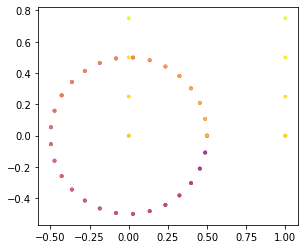

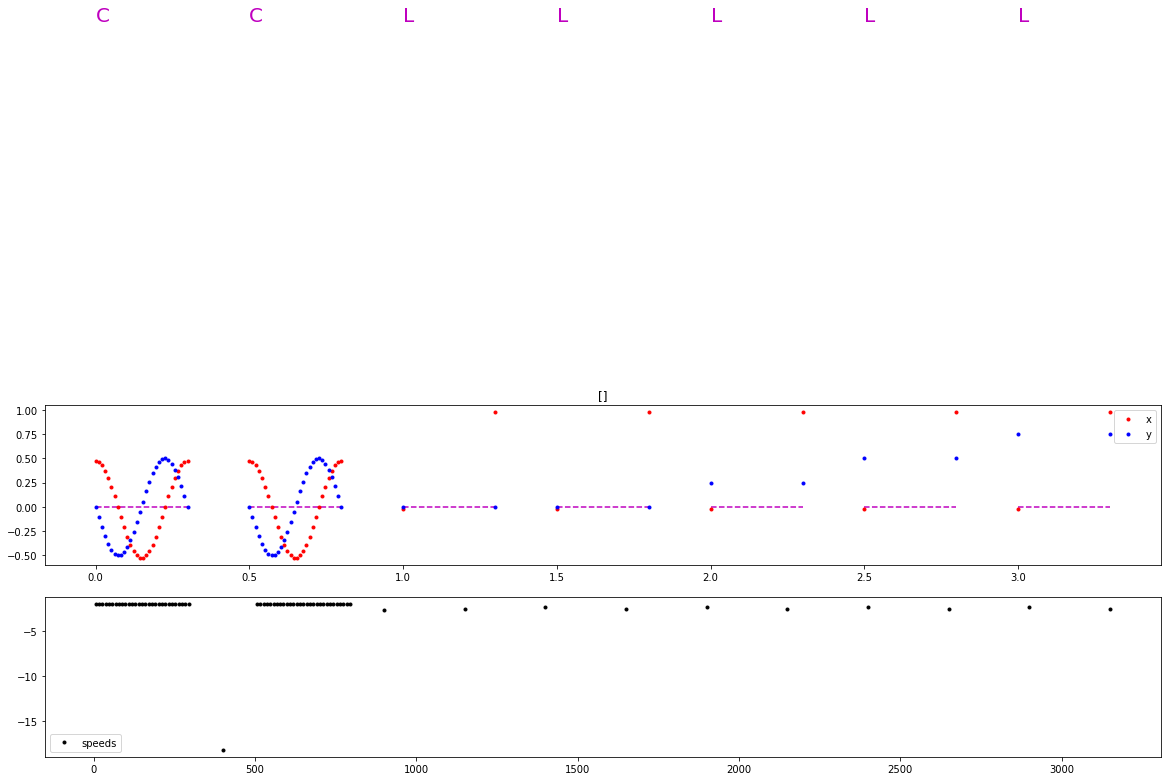

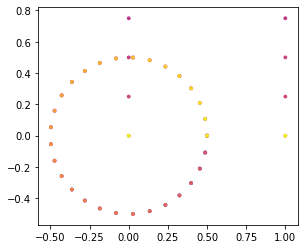

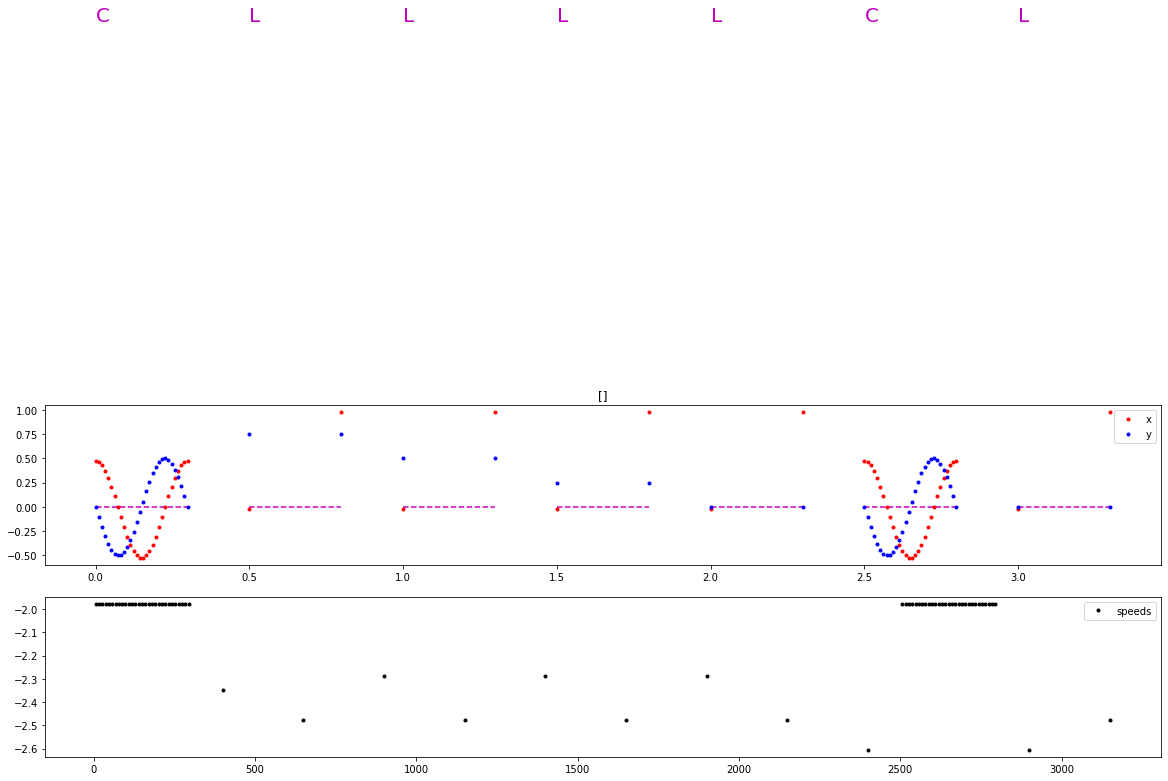

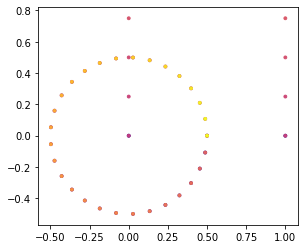

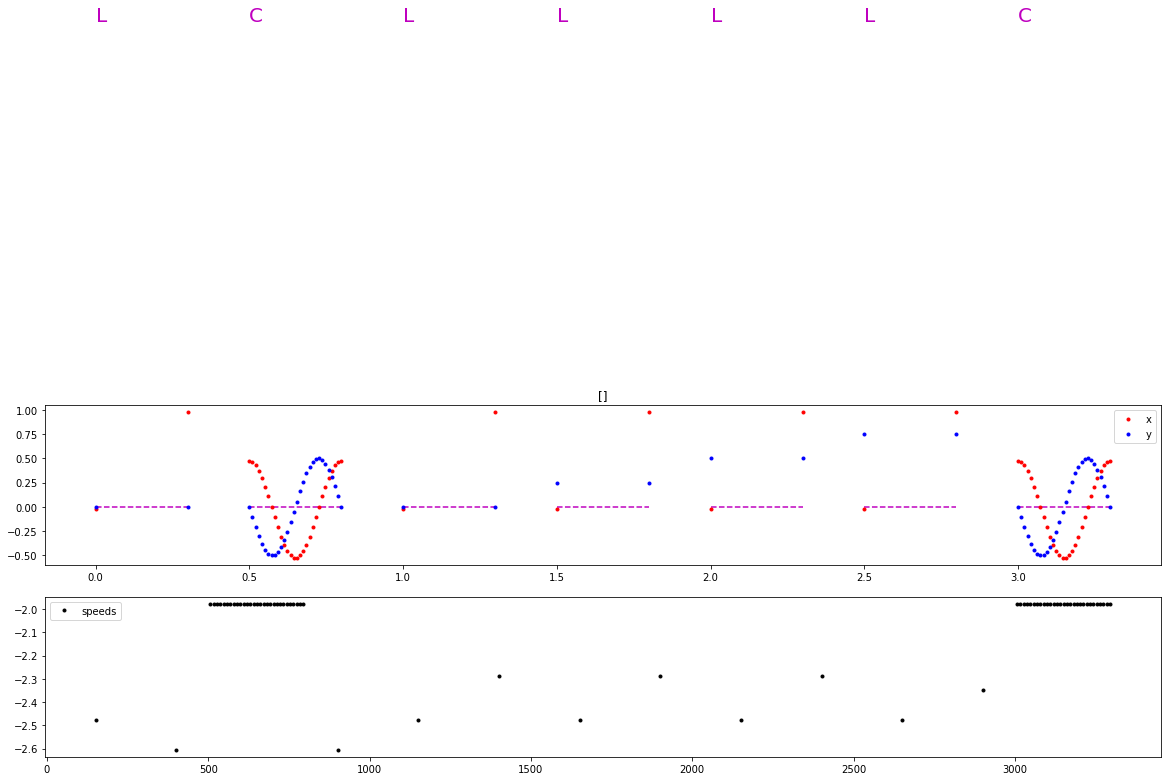

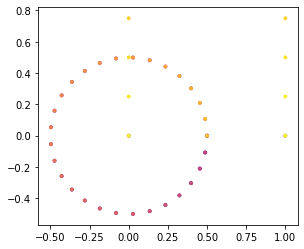

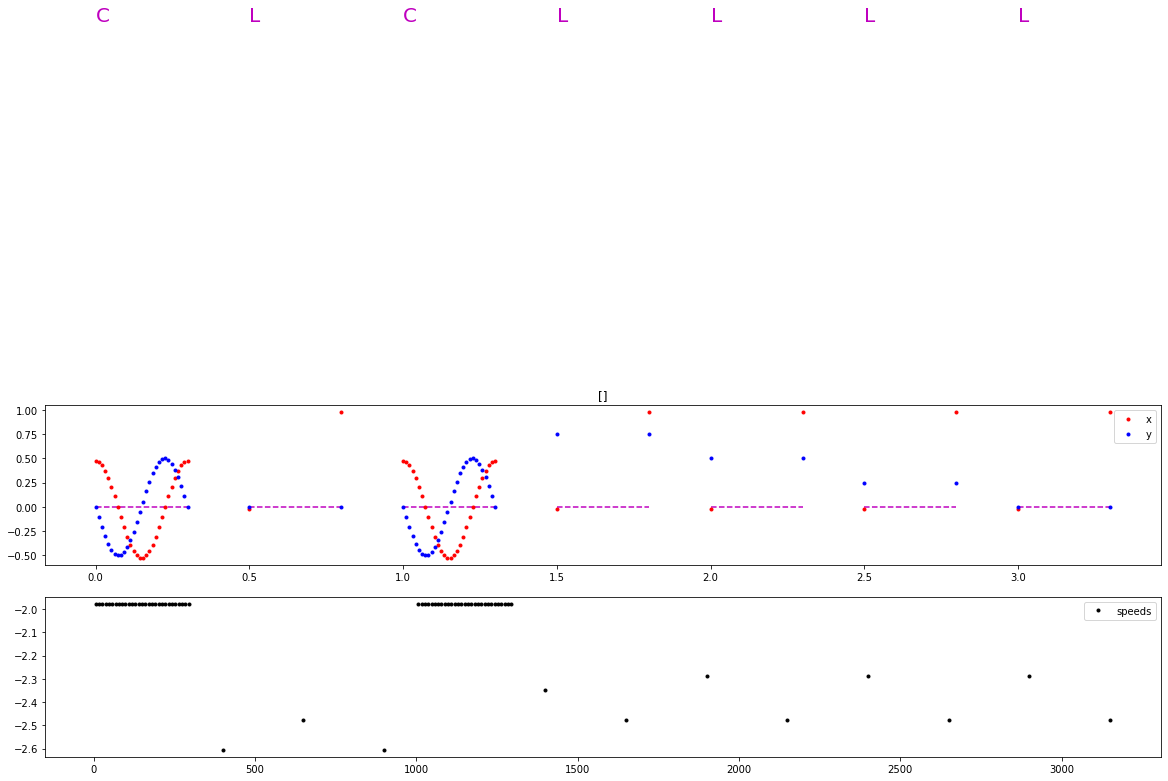

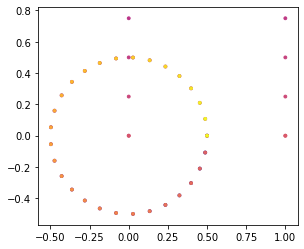

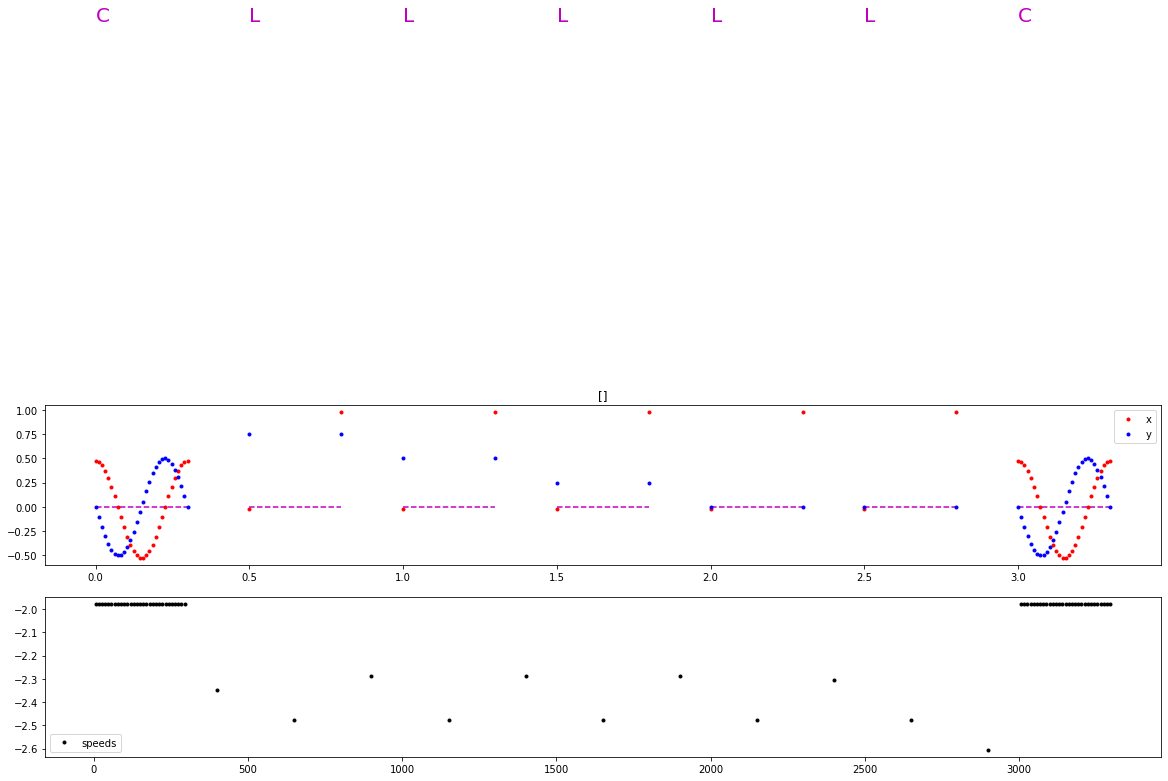

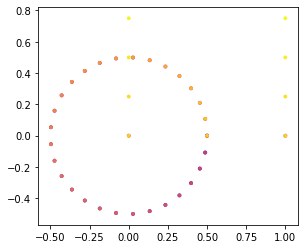

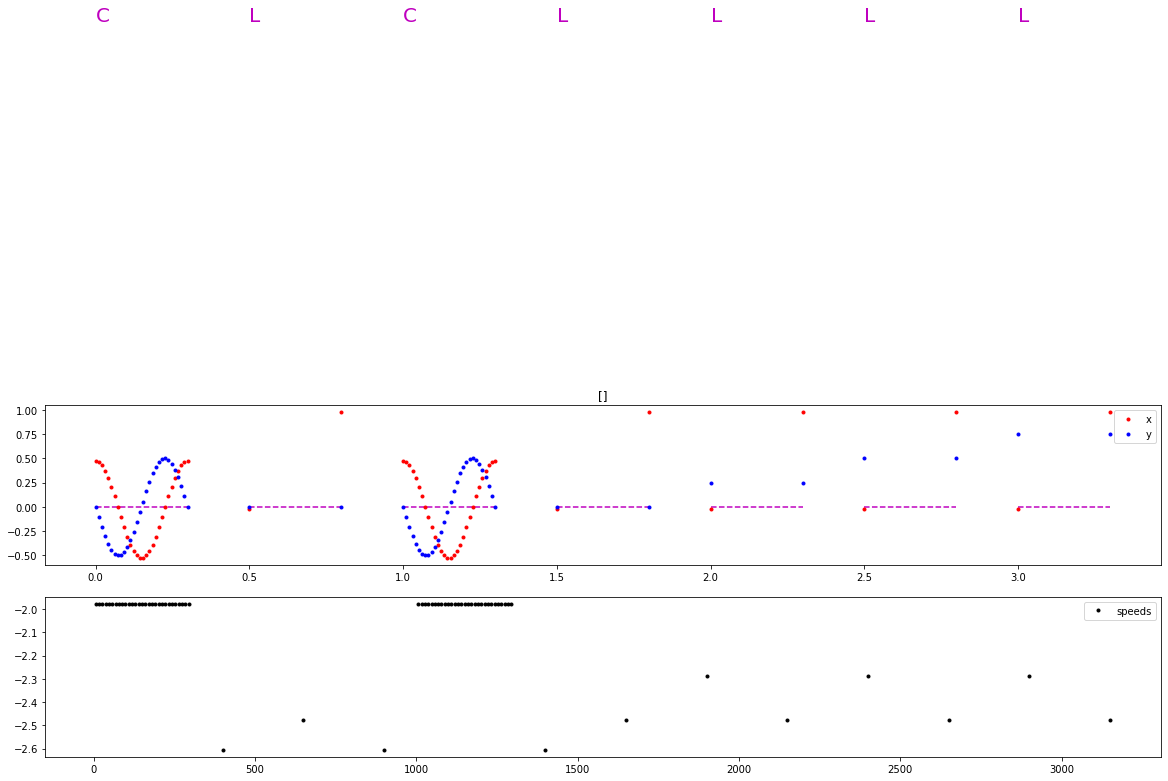

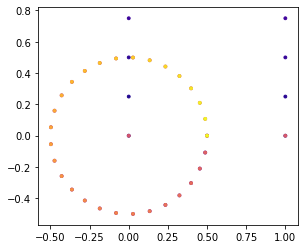

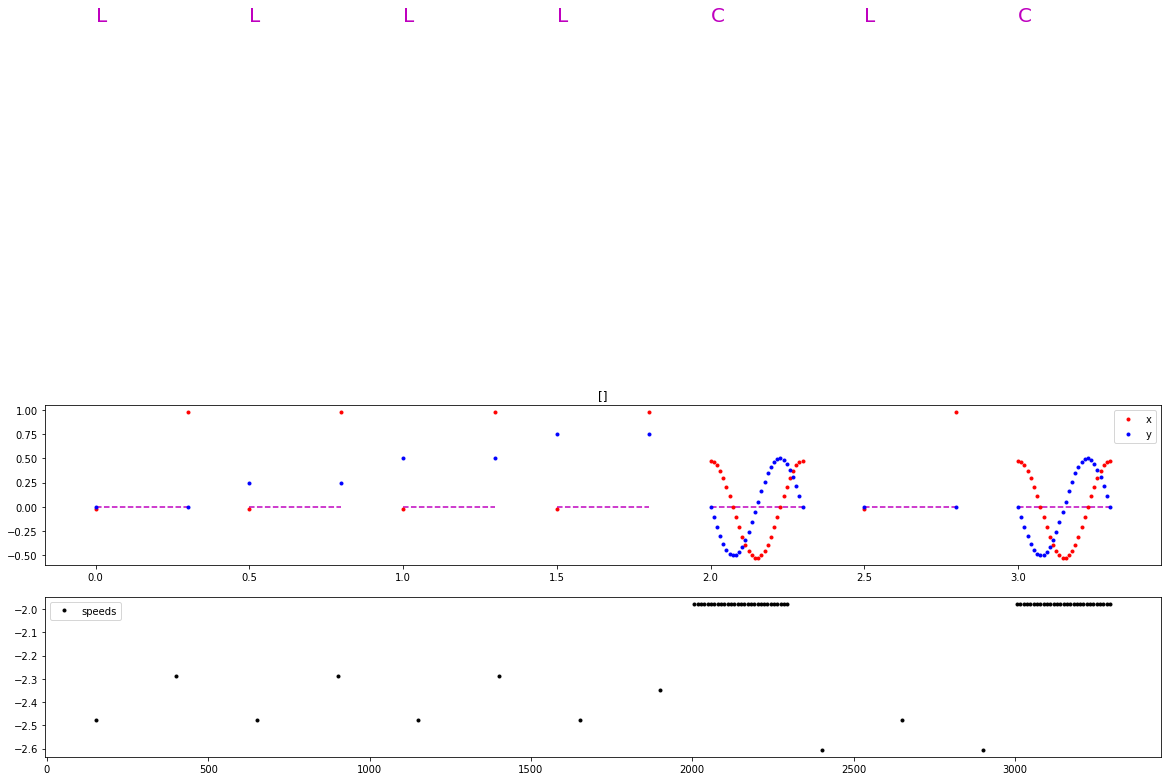

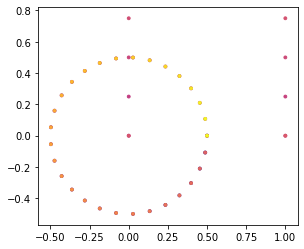

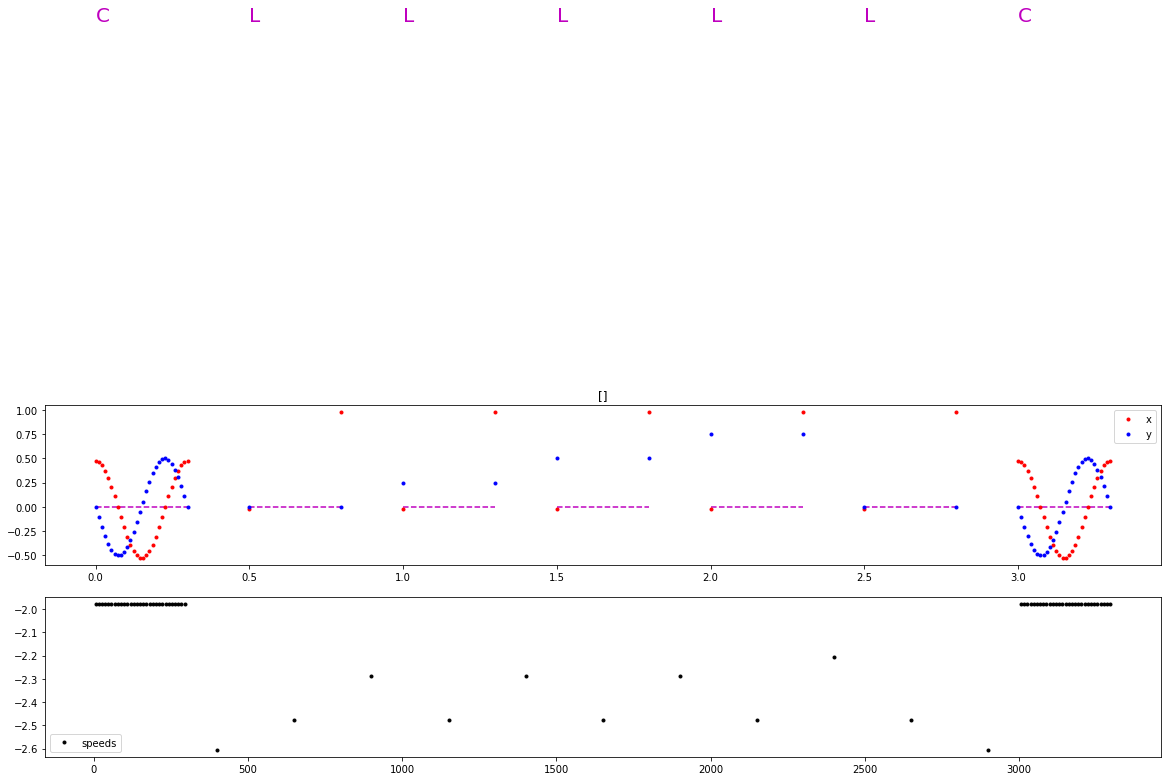

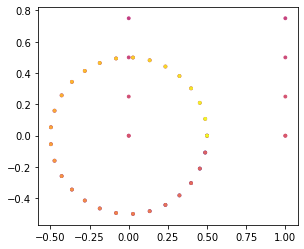

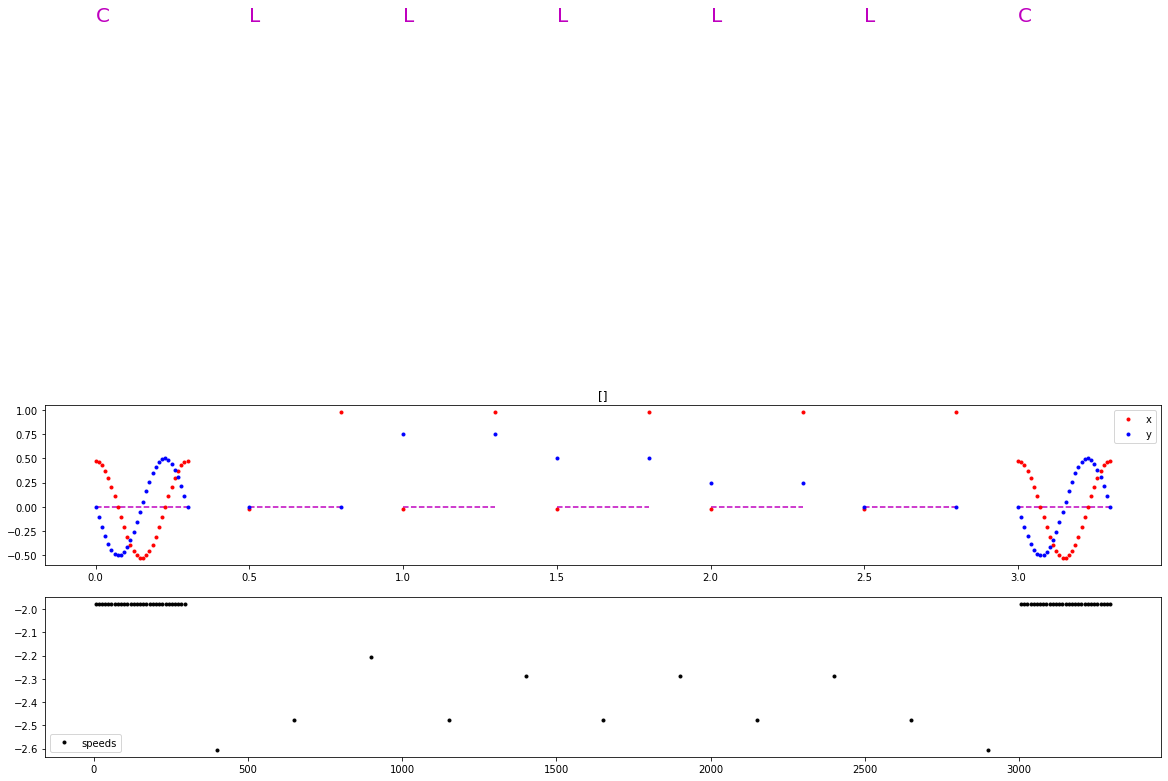

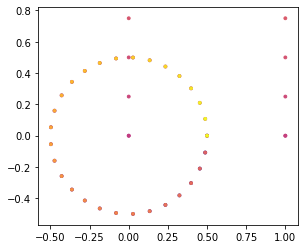

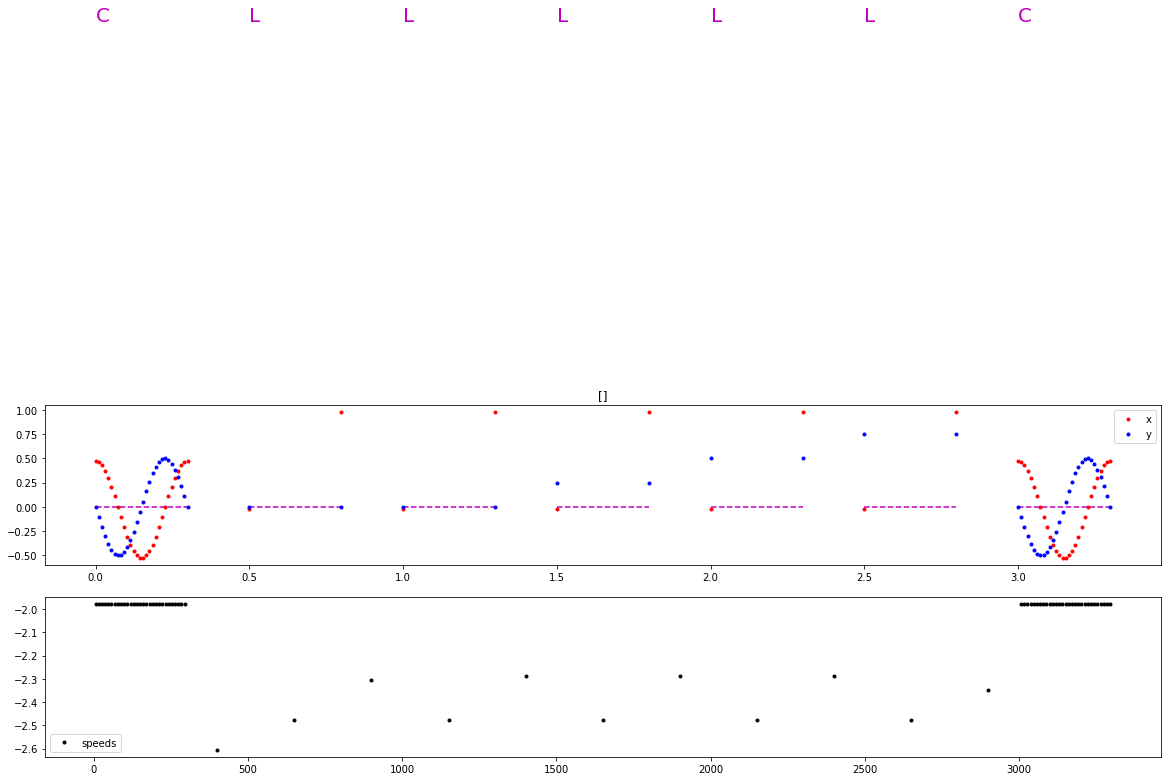

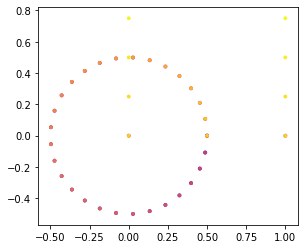

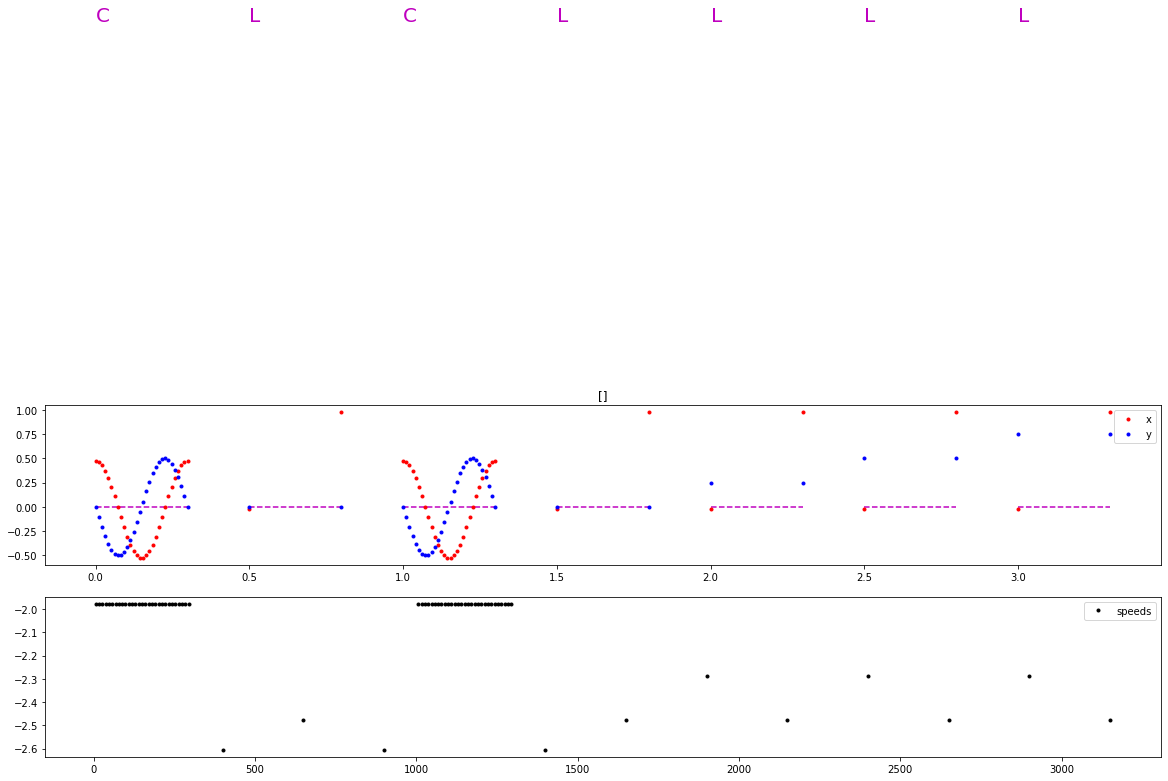

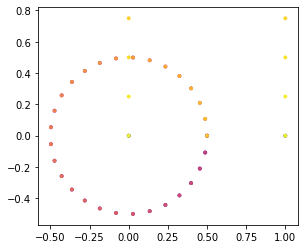

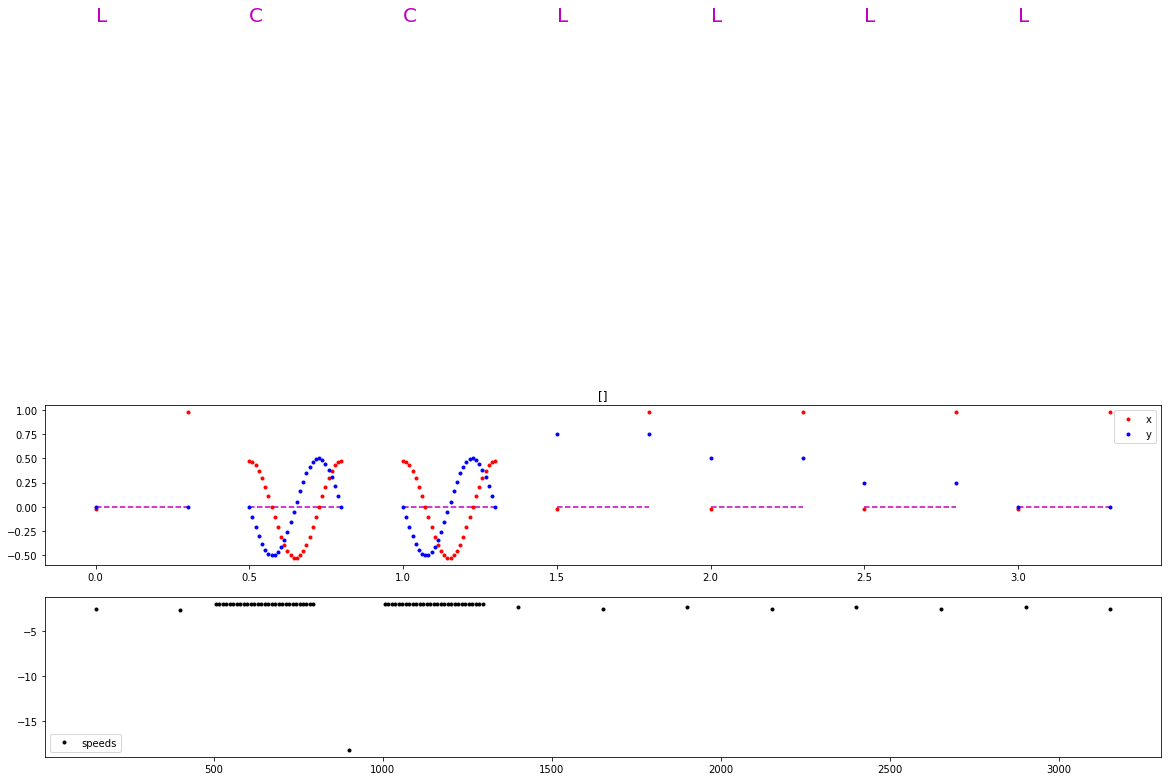

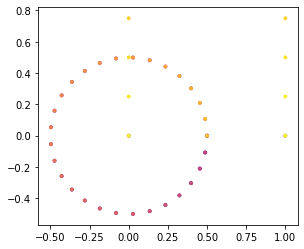

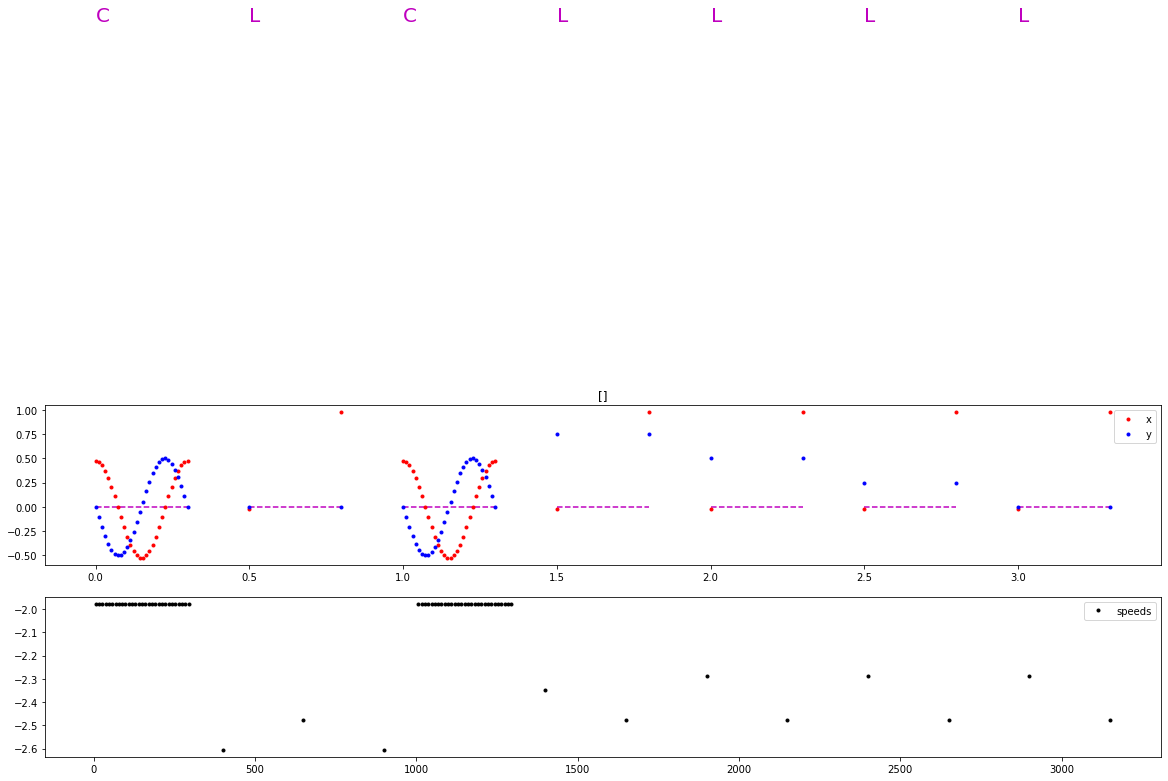

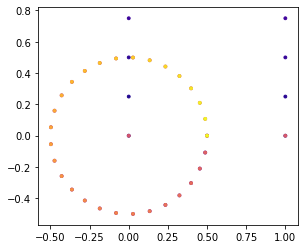

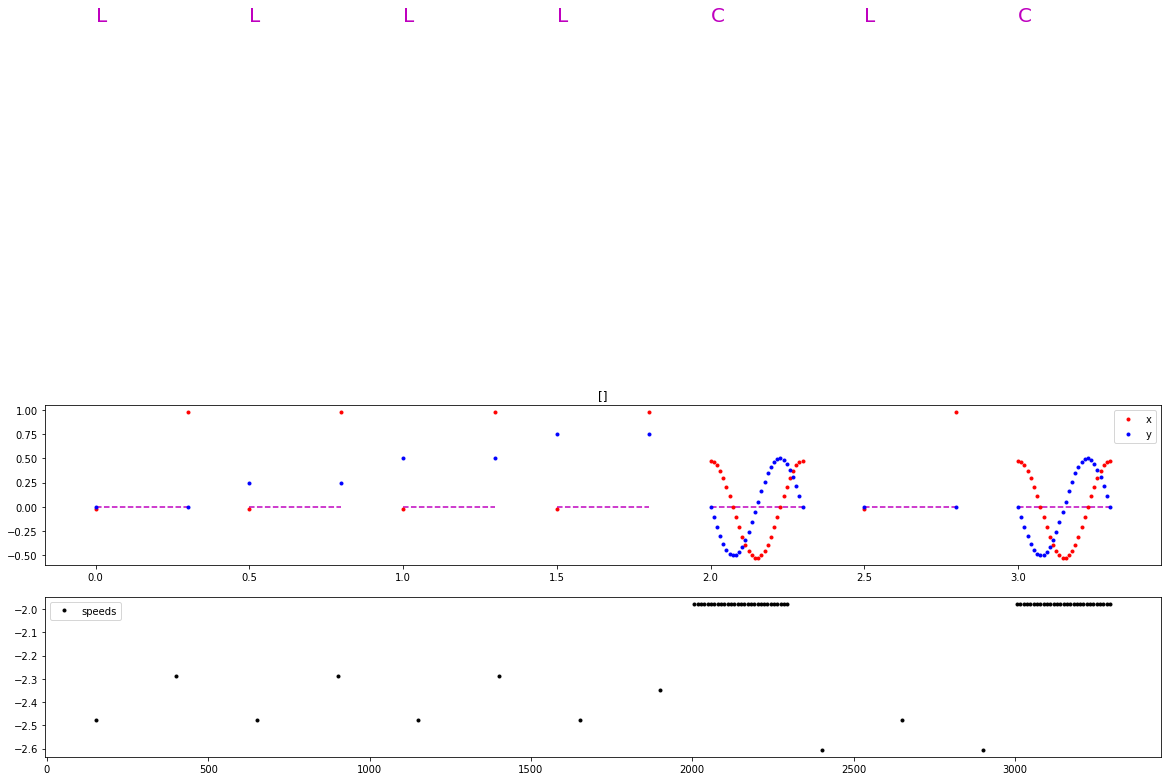

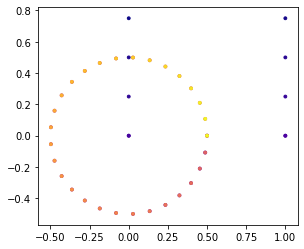

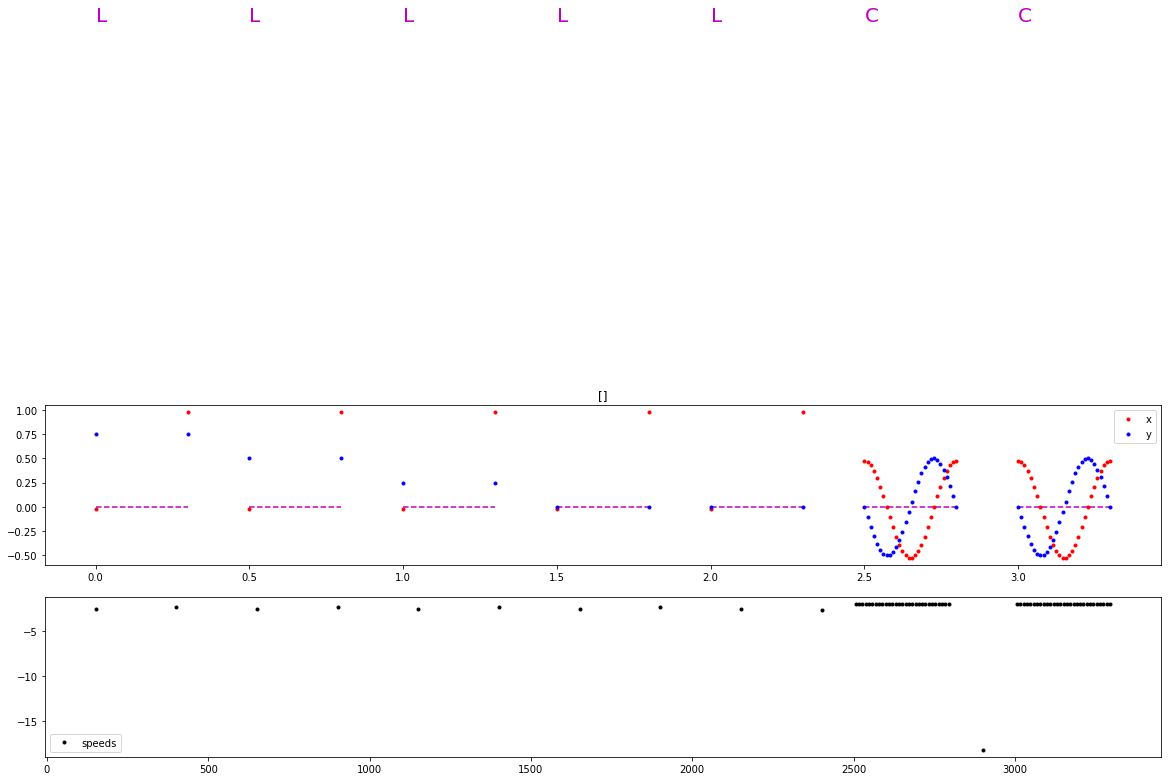

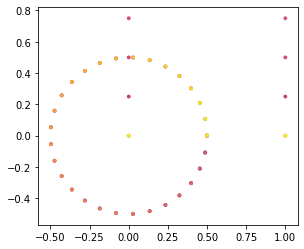

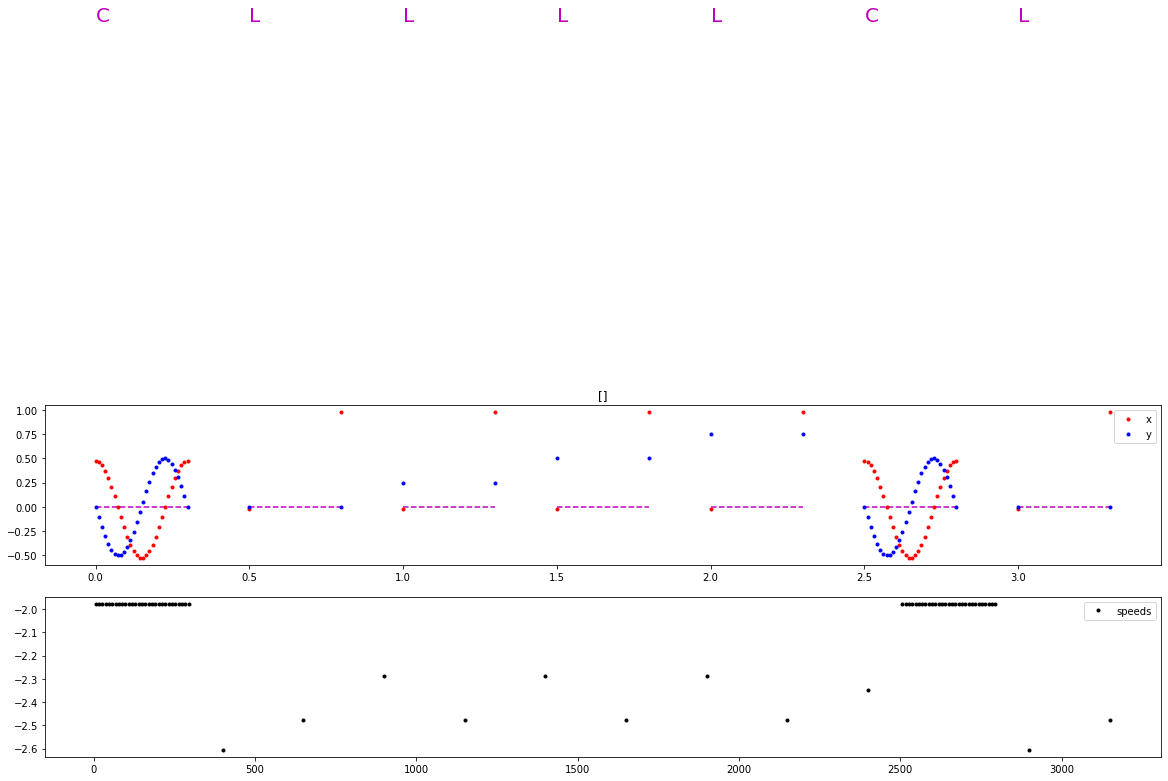

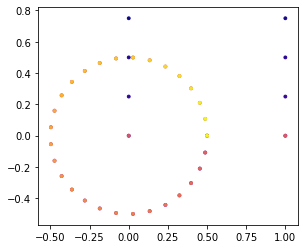

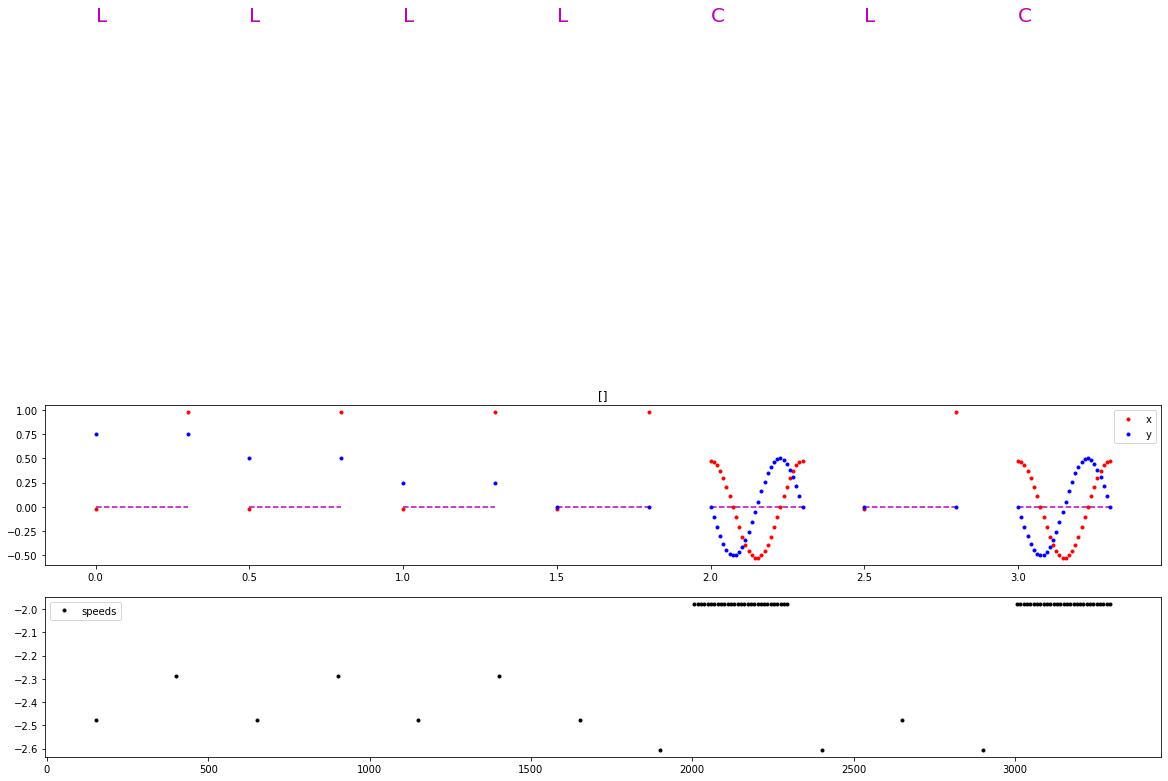

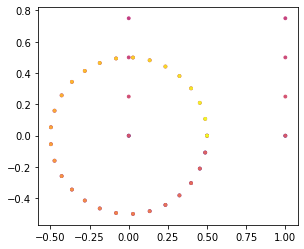

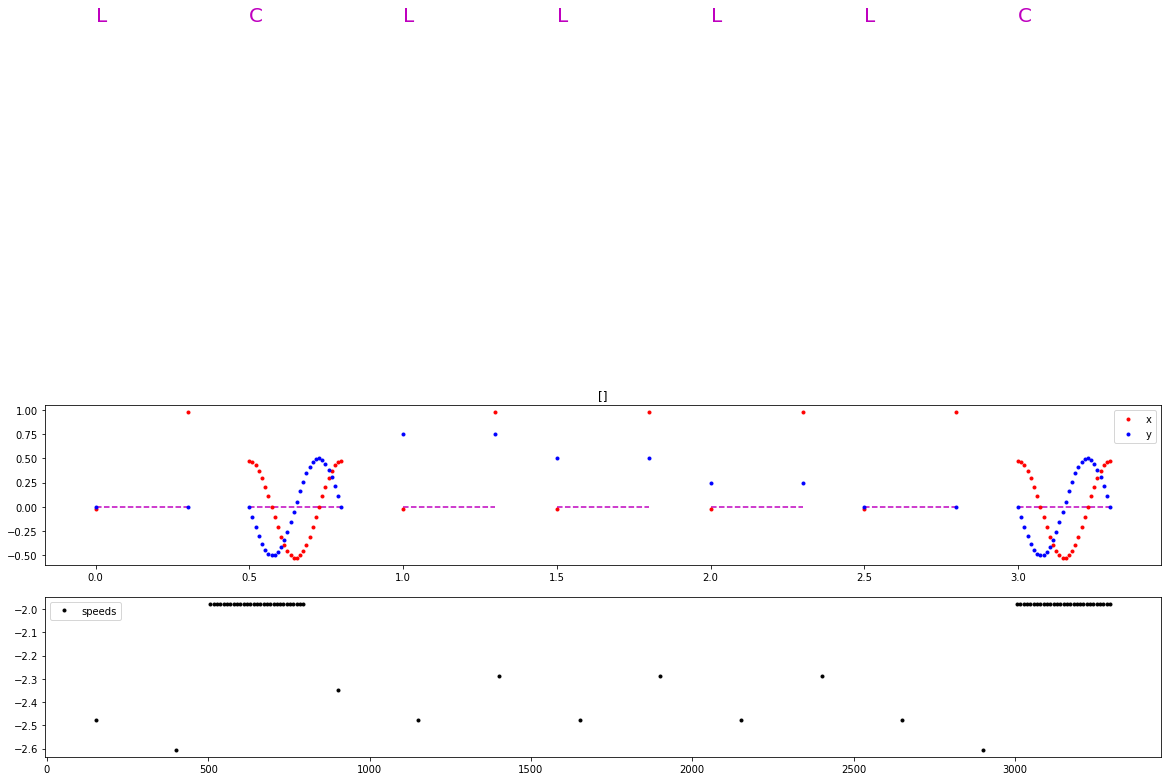

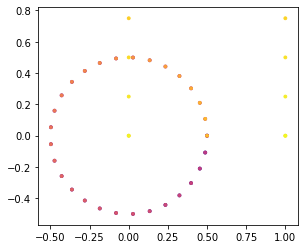

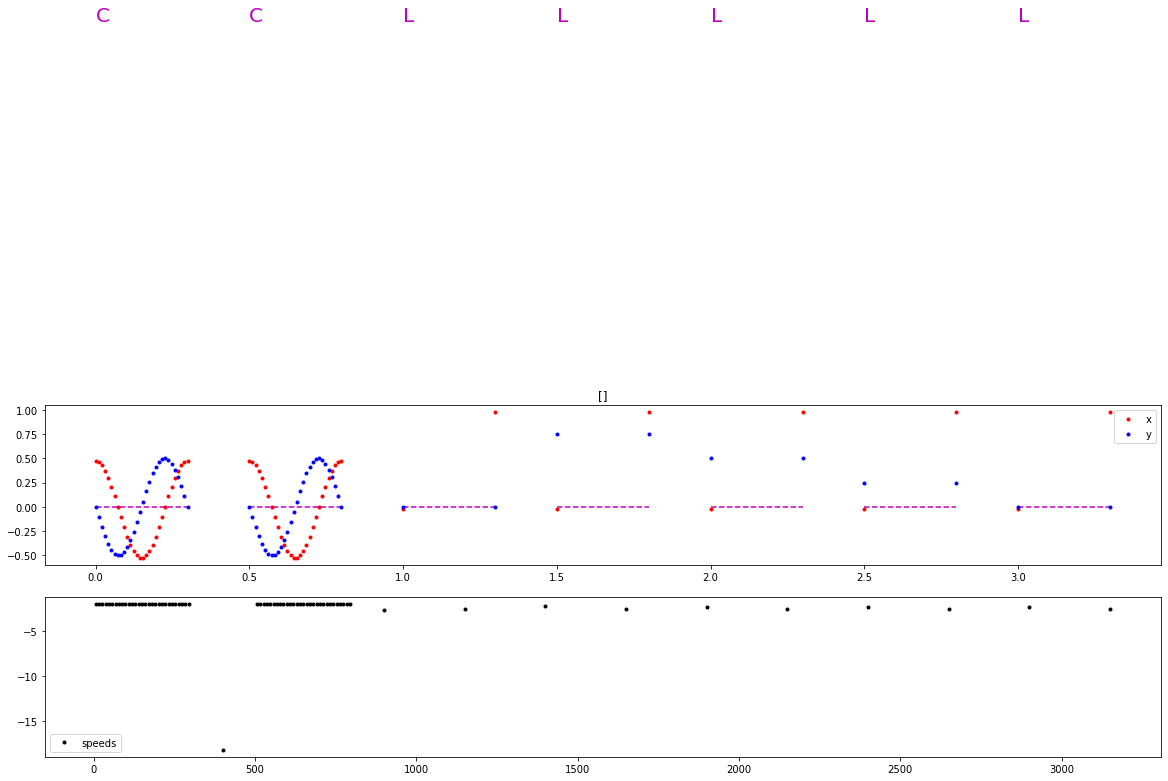

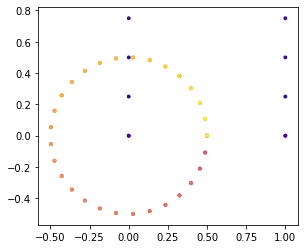

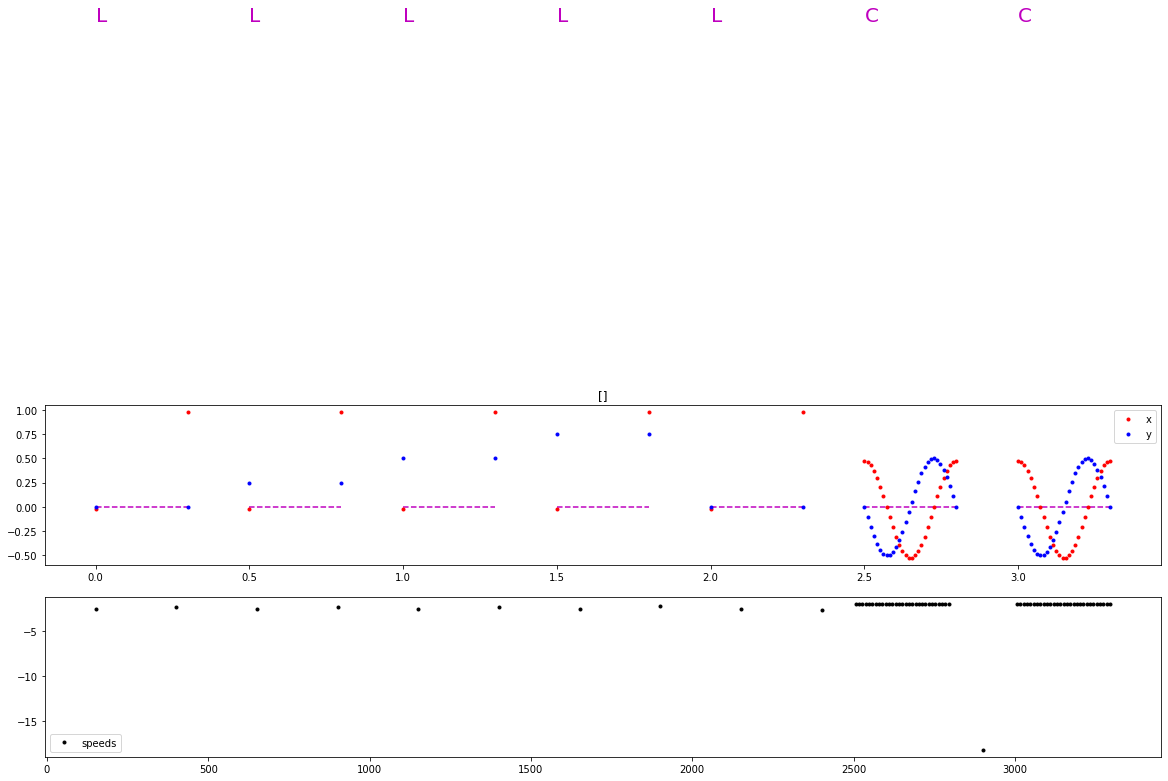

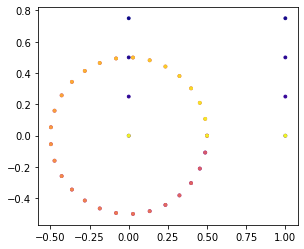

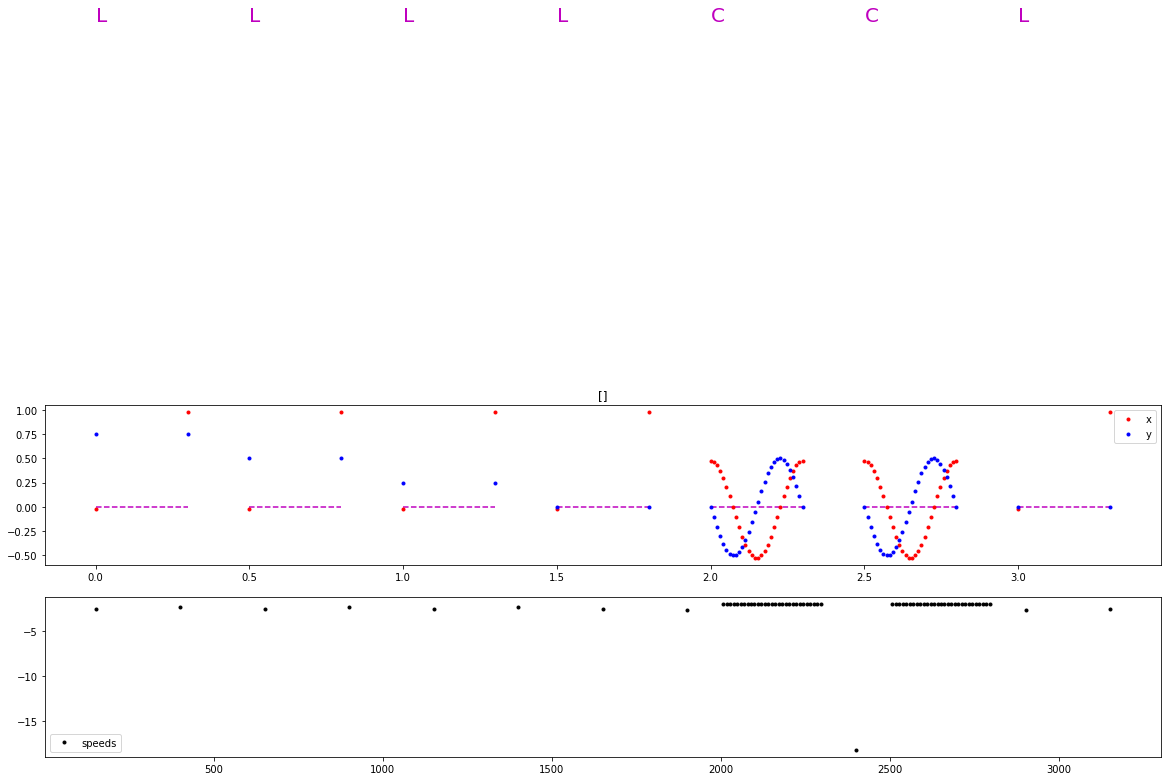

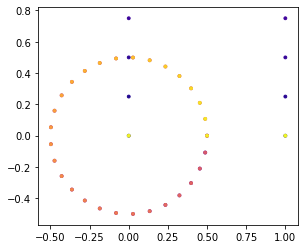

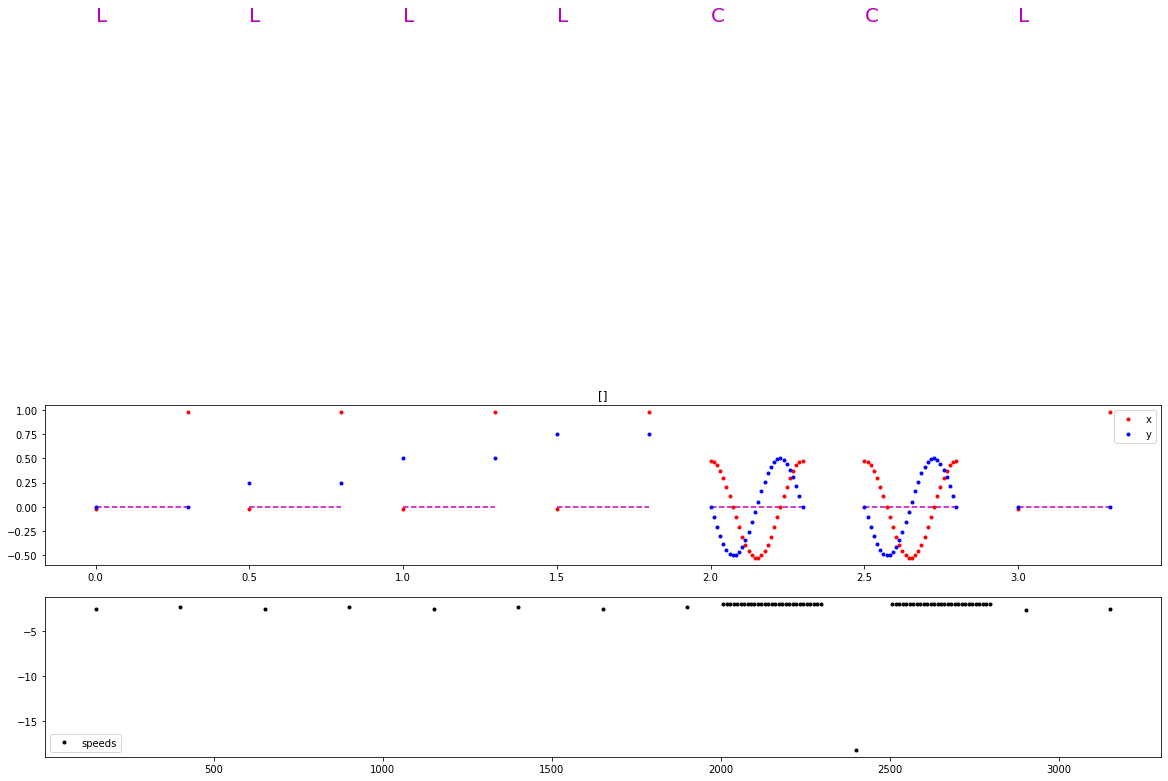

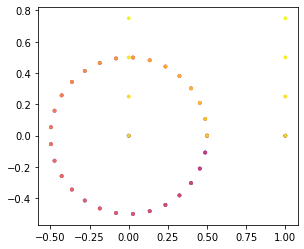

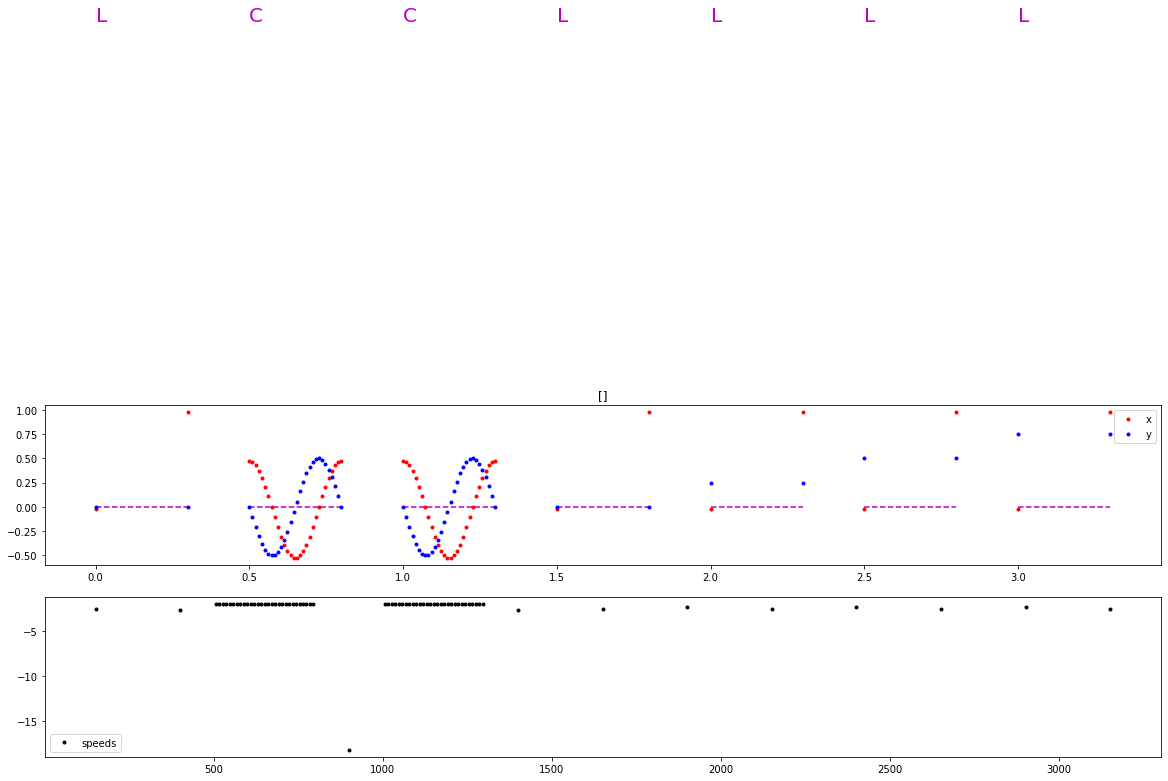

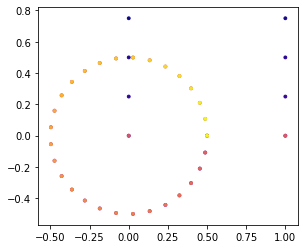

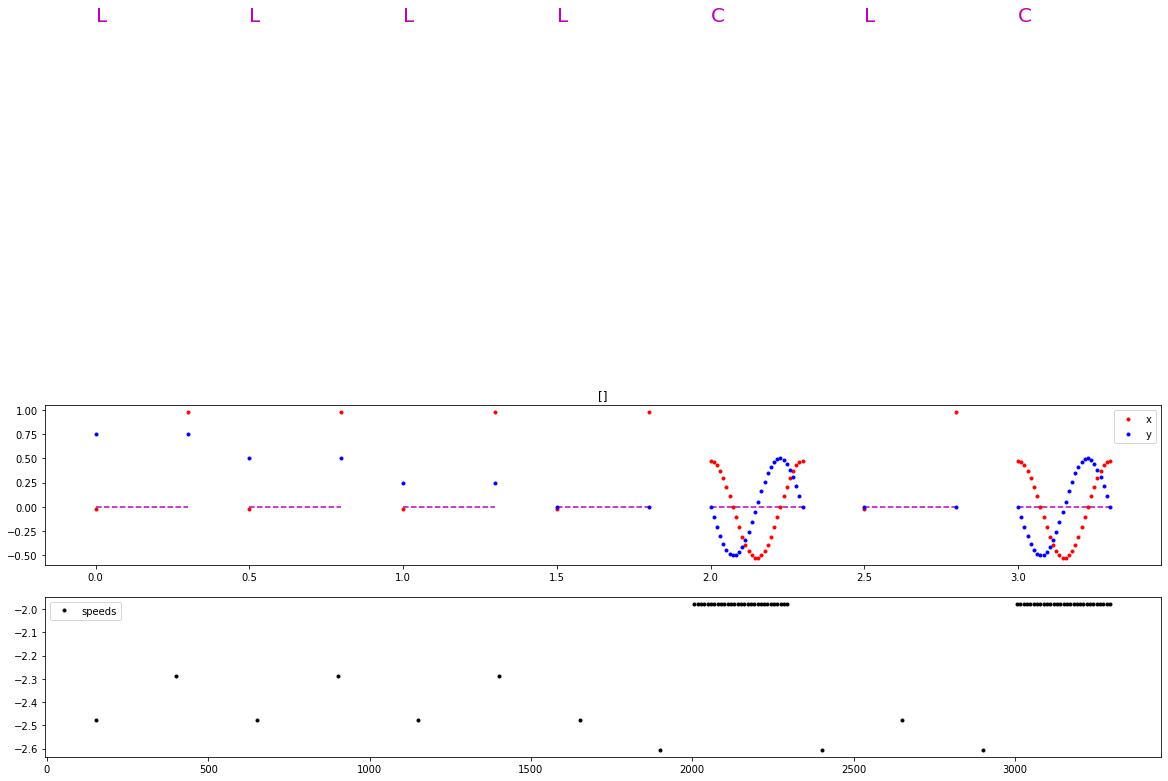

In [70]:
# ===== for each parse, convert to sequnce of primitives

# ==== given program convert into "strokes", so that can pass into same behavioral aalysis as for subjects
import numpy as np
def program2strokes(program):
    # program is list of numpy arrays
    # will put down times in order. will be in fake milliseconds. 
    
    on = 1
    off = 300
    strokes = []
    for p in program:
        times = np.linspace(on, off, p.shape[0])
        p = np.concatenate((p, times[:,None]), axis=1)
        on+=500
        off+=500
        strokes.append(p)
    return strokes
    
# strokes = program2strokes(dreams[1].evaluate([]))
# strokes = program2strokes(result.allFrontiers[tasks[1]].bestPosterior.program.evaluate([]))
# strokes = [s.tolist() for s in strokes]

for PPP in PP:
    strokes = program2strokes(PPP.flatten())

#     print(strokes)
    # === TOOLS to analyze/plot dreamcoder programs
    # === 3) Load tools to to things with tasks/programs
    datflat = []
    datflat.append({
        "trialstrokes":strokes,
        "trialonset": 0,
        "stimname": "test",
        "trialprimitives":[],
        "trialcircleparams":[],
        "condition":[],
    })


    # ==== do segmentation
    import sys
    sys.path.append("/Users/lucastian/tenen/TENENBAUM/drawgood/experiments")
    from segmentation import *
    from utils import *


    # PLOT
    getSegmentation(datflat)

    from plotsDatFlat import *
    from plotsSingleSubj import *
    from segmentation import *

    plotDrawingAndTimecourse(datflat[0])


In [57]:
PP

{Parse([Chunk([array([[ 0.  , -0.75],
        [ 1.  , -0.75]]), array([[ 0. , -0.5],
        [ 1. , -0.5]]), array([[ 0.  , -0.25],
        [ 1.  , -0.25]]), array([[0., 0.],
        [1., 0.]])]), Chunk([array([[ 5.00000000e-01,  0.00000000e+00],
        [ 4.88310278e-01,  1.07485220e-01],
        [ 4.53787710e-01,  2.09944551e-01],
        [ 3.98046533e-01,  3.02587108e-01],
        [ 3.23693142e-01,  3.81081028e-01],
        [ 2.34204220e-01,  4.41756022e-01],
        [ 1.33764169e-01,  4.81774996e-01],
        [ 2.70694543e-02,  4.99266707e-01],
        [-8.08909983e-02,  4.93413261e-01],
        [-1.85069078e-01,  4.64488360e-01],
        [-2.80593533e-01,  4.13844499e-01],
        [-3.62997746e-01,  3.43849729e-01],
        [-4.28428588e-01,  2.57776929e-01],
        [-4.73826586e-01,  1.59650765e-01],
        [-4.97068979e-01,  5.40595092e-02],
        [-4.97068979e-01, -5.40595092e-02],
        [-4.73826586e-01, -1.59650765e-01],
        [-4.28428588e-01, -2.57776929e-01],
     

In [45]:
g0 = Grammar.uniform(primitives)
#p = Program.parse("(repeat line 4 ")
p = Program.parse("(connect line #(connect (transform line (transmat None (Some angle2) None None None)) circle))")
#p = _repeat(_connect(_line,_circle), 3, _makeAffine(x=1.0))
Parse.animate_all(Parse.ofProgram(p), "/tmp/parses.png")
for i in range(50):
                                p = g0.sample(tstroke, maximumDepth=10)
                                if p is None: continue
                                Parse.animate_all(Parse.ofProgram(p), f"/tmp/parses{i}.png")
print("Primitives:")
print(primitives)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


KeyboardInterrupt: 